In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Here is a summary of the limits we know so far
* x = +0.87mm and -0.83mm
* y = 1.07mm and -0.72mm
* z = + 3.17mm and -3.75mm
* Rz = +351 urad

### We moved M2 by +x=1mm, it stopped at +x=0.87mm

In [6]:
start = Time('2020-03-04T15:25:00') #this is UTC
end = Time('2020-03-04T15:30:00') 

client = EfdClient('summit_efd')
csc_index = 1

In [7]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,piston,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,thetaZPosition,xPosition,xTilt,yPosition,yTilt
2020-03-04 15:25:00.026000+00:00,256.898116,1,1.583336e+09,125069,1.583336e+09,c3c6bc7d,457589,1.583336e+09,5.132646e-08,-0.089068,3.514475e-08,-0.122623,-7.423110e-09
2020-03-04 15:25:00.076000+00:00,256.898116,1,1.583336e+09,125069,1.583336e+09,c3c6bc7d,457598,1.583336e+09,5.132646e-08,-0.089068,3.514475e-08,-0.122623,-7.423110e-09
2020-03-04 15:25:00.125000+00:00,256.898116,1,1.583336e+09,125069,1.583336e+09,c3c6bc7d,457607,1.583336e+09,5.132646e-08,-0.089068,3.514475e-08,-0.122623,-7.423110e-09
2020-03-04 15:25:00.177000+00:00,256.898116,1,1.583336e+09,125069,1.583336e+09,c3c6bc7d,457616,1.583336e+09,5.132646e-08,-0.089068,3.514475e-08,-0.122623,-7.423110e-09
2020-03-04 15:25:00.227000+00:00,256.898116,1,1.583336e+09,125069,1.583336e+09,c3c6bc7d,457625,1.583336e+09,5.132646e-08,-0.089068,3.514475e-08,-0.122623,-7.423110e-09


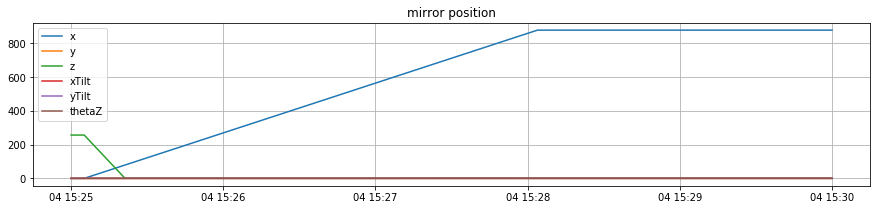

In [20]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xPosition, label='x')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yPosition, label='y')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.piston, label='z')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xTilt, label='xTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yTilt, label='yTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.thetaZPosition, label = 'thetaZ')
plt.title('mirror position')
plt.legend()
plt.grid();

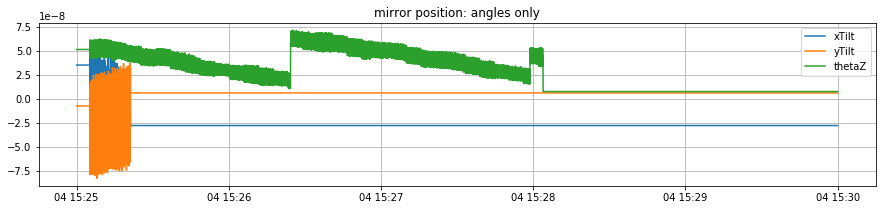

In [23]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xTilt, label='xTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yTilt, label='yTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.thetaZPosition, label = 'thetaZ')
plt.title('mirror position: angles only')
plt.legend()
plt.grid();

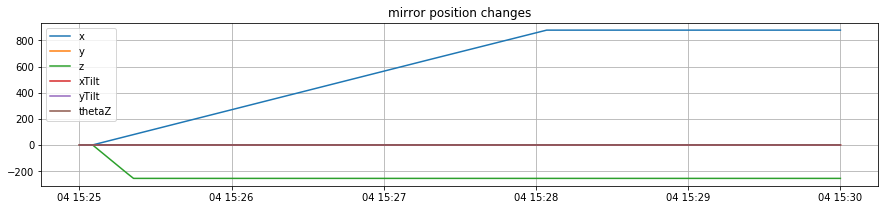

In [22]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xPosition-df.xPosition[0], label='x')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yPosition-df.yPosition[0], label='y')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.piston-df.piston[0], label='z')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xTilt-df.xTilt[0], label='xTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yTilt-df.yTilt[0], label='yTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.thetaZPosition-df.thetaZPosition[0], label = 'thetaZ')
plt.title('mirror position changes')
plt.legend()
plt.grid();

In [26]:
min(df.xPosition), max(df.xPosition)

(-0.08906768440889816, 879.1623011825322)

### We moved it back with csv scripts - we divided the total distance each actuator need to move into 1000. Move all the actuators simultaneously
* see move_back.ipynb

In [32]:
start = Time('2020-03-04T17:06:00') #this is UTC
end = Time('2020-03-04T17:20:00') 
df = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

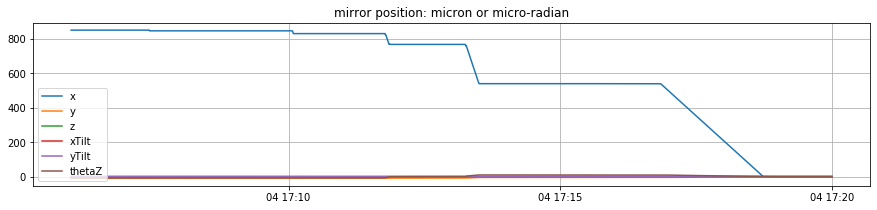

In [33]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xPosition, label='x')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yPosition, label='y')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.piston, label='z')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xTilt*1e6, label='xTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yTilt*1e6, label='yTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.thetaZPosition*1e6, label = 'thetaZ')
plt.title('mirror position: micron or micro-radian')
plt.legend(loc='lower left')
plt.grid();

### -x

In [36]:
start = Time('2020-03-04T23:42:00') #this is UTC
end = Time('2020-03-05T00:08:00') 
df = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

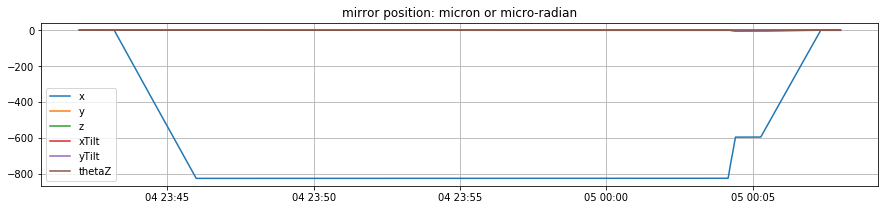

In [37]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xPosition, label='x')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yPosition, label='y')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.piston, label='z')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xTilt*1e6, label='xTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yTilt*1e6, label='yTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.thetaZPosition*1e6, label = 'thetaZ')
plt.title('mirror position: micron or micro-radian')
plt.legend(loc='lower left')
plt.grid();

### y and z direction

In [40]:
start = Time('2020-03-05T00:08:00') #this is UTC
end = Time('2020-03-05T01:08:00') 
df = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

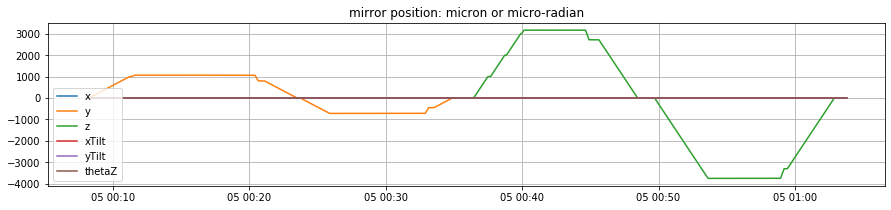

In [41]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xPosition, label='x')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yPosition, label='y')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.piston, label='z')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xTilt*1e6, label='xTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yTilt*1e6, label='yTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.thetaZPosition*1e6, label = 'thetaZ')
plt.title('mirror position: micron or micro-radian')
plt.legend(loc='lower left')
plt.grid();